<a href="https://colab.research.google.com/github/Osw1997/An-Introduction-to-Statistical-Learning/blob/main/Scripts/Linear%20regression/applied_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 3 - Linear regression

# Applied exercises
---
---
---
## Exercise 8
## Involved dataset: Auto

In [36]:
!pip install --upgrade scipy
!pip install --upgrade plotly

     |████████████████████████████████| 26.5 MB 103.7 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import t

In [3]:
import scipy
scipy.__version__

'1.7.3'

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
auto = pd.read_csv('drive/MyDrive/itsl_datasets/Auto.csv')
# auto = pd.read_csv("../../Datasets/Auto.csv")
## Cleaning data
# Getting incorrect rows and getting mean of correct rows
valid_rows = auto['horsepower'] != '?'
mean_valid_rows = pd.to_numeric(auto[valid_rows]['horsepower']).mean()
# Correcting data
auto[~valid_rows] = mean_valid_rows
auto['horsepower'] = pd.to_numeric(auto['horsepower'])
auto['mpg'] = pd.to_numeric(auto['mpg'])

auto.describe()
# auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,24.466365,6.718758,193.279211,104.469388,2941.398859,16.661327,76.338405,2.872410
std,11.916122,11.182938,104.465120,38.247388,902.933828,10.300906,4.849520,11.516536
min,9.000000,3.000000,68.000000,46.000000,104.469388,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.469388,76.000000,2219.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,95.000000,2790.000000,15.500000,76.000000,1.000000
75%,29.500000,8.000000,262.000000,125.000000,3609.000000,17.300000,79.000000,2.000000
max,104.469388,104.469388,455.000000,230.000000,5140.000000,104.469388,104.469388,104.469388


In [5]:
linear_regression = stats.linregress(auto["horsepower"], auto["mpg"])
print(f"Slope: {linear_regression.slope}, intercept: {linear_regression.intercept}")

Slope: -0.15784473335365345, intercept: 40.956307738900364


In [6]:
print(f"Is Pvalue < 0.05? {linear_regression.pvalue < 0.5} ({linear_regression.pvalue})")
print(f"Is intercept > 0? {linear_regression.intercept > 0} ({linear_regression.intercept})")
print(f"Slope B_1 = {linear_regression.slope}")

print("")
print("mpg(HP) = B_0 + B_1 * HP ")
print("HP = 98 hp")
print(f"mpg(98) = {linear_regression.intercept} + {linear_regression.slope} * 98")
print(f"mpg(98) = {linear_regression.intercept + linear_regression.slope * 98}")

print("")
t_test = lambda p, df: abs(t.ppf(p/2, df))
conf_interval = t_test(0.05, len(auto['mpg']))
print(f"slope (95%): {linear_regression.slope:.6f} +/- {conf_interval*linear_regression.stderr:.6f}")
print(f"slope (95%): {linear_regression.intercept:.6f} +/- {conf_interval*linear_regression.intercept_stderr:.6f}")

Is Pvalue < 0.05? True (2.835654435365766e-27)
Is intercept > 0? True (40.956307738900364)
Slope B_1 = -0.15784473335365345

mpg(HP) = B_0 + B_1 * HP 
HP = 98 hp
mpg(98) = 40.956307738900364 + -0.15784473335365345 * 98
mpg(98) = 25.487523870242327

slope (95%): -0.157845 +/- 0.026570
slope (95%): 40.956308 +/- 2.955523


## Questions
### Is there any relationship between predictor and the response?
#### A = **Yes. Pvalue is less than 0.05 and intercept is != 0. So, we can discard H0 (null) hipotesis**
### How strong is the relationship between the predictor and the response? R^2 (???)
#### A = **Well, B_1 is -0.16. So, there is a negative correlation**
### Is the relationship between the predictor and the response positive or negative?
#### A = **Negative**
### What is the predicted mpg associated with a horsepower of 98? What are the associated 95% confidence and prediction intervals?
#### mpg(98) = 40.956307738900364 + -0.15784473335365348 * 98
#### **mpg(98) = 25.48752387024232**
#### slope (95%): -0.157845 +/- 0.026570
#### **slope (95%): 40.956308 +/- 2.955523**

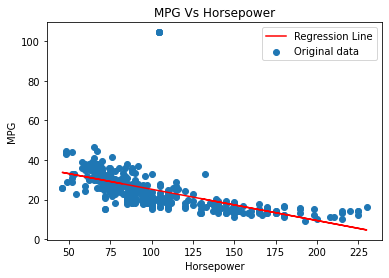

In [7]:
# Plot the response and the predictor. Show the least squares regression line.
plt.scatter(auto["horsepower"], auto['mpg'], label="Original data")
plt.title("MPG Vs Horsepower")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.plot(auto["horsepower"], linear_regression.intercept + linear_regression.slope * auto['horsepower'], 'r', label="Regression Line")
plt.legend()
plt.show()

---
---
---

## Exercise 9
## Involved dataset: Auto
## Type regression: Multiple

In [8]:
# (a) Produce a scatterplot matrix which includes all of the variables
# in the data set.
import plotly.express as px
numeric_columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 
                   'weight', 'acceleration', 'year', 'origin']
fig = px.scatter_matrix(auto[numeric_columns])
fig.update_traces(diagonal_visible=False)
fig.show()

In [32]:
# (b) Compute the matrix of correlations between the variables using
# the function cor(). You will need to exclude the name variable, cor() which is qualitative.
import plotly.express as px
numeric_columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 
                   'weight', 'acceleration', 'year'
                #    , 'origin'
                   ]

import numpy as np
corr_matrix = np.corrcoef(auto[numeric_columns], rowvar=False)

# corr_matrix

fig = px.imshow(corr_matrix
                , text_auto=True
                , labels=dict(x="Columns", y="Columns")
                , x=numeric_columns
                , y=numeric_columns
                , aspect="auto"
                , color_continuous_scale="BuPu"
                )
fig.update_xaxes(side="top")
fig.show()

In [53]:
# (c) Use the lm() function to perform a multiple linear regression
# with mpg as the response and all other variables except name as
# the predictors. Use the summary() function to print the results.
import statsmodels.formula.api as smf
mult_linear_regression_instance = smf.ols(formula="mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin", data=auto)
mlr = mult_linear_regression_instance.fit()
mlr.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.923    
Dependent Variable: mpg              AIC:                2086.2328
Date:               2022-01-18 03:38 BIC:                2118.1043
No. Observations:   397              Log-Likelihood:     -1035.1  
Df Model:           7                F-statistic:        675.2    
Df Residuals:       389              Prob (F-statistic): 3.10e-213
R-squared:          0.924            Scale:              10.992   
------------------------------------------------------------------
                  Coef.   Std.Err.    t    P>|t|   [0.025   0.975]
------------------------------------------------------------------
Intercept        -14.9193   4.3541 -3.4265 0.0007 -23.4799 -6.3587
cylinders         -0.8305   0.2259 -3.6771 0.0003  -1.2746 -0.3865
displacement       0.0228   0.0072  3.1507 0.0018   0.0086  0.0370
horsepower        -0.0189   0.0137 -1.3789 0.1687  -0.0457  0.0080
weight            -0.0063   0.0006 -9.8605 0.0000  -0.0076 -0.0051
acceleration       0.0429   0.0951  0.4512 0.6521  -0.1440  0.2298
year               0.7462   0.0507 14.7209 0.0000   0.6465  0.8459
origin             1.1874   0.2244  5.2920 0.0000   0.7462  1.6285
------------------------------------------------------------------
Omnibus:               37.262       Durbin-Watson:          1.304 
Prob(Omnibus):         0.000        Jarque-Bera (JB):       66.461
Skew:                  0.575        Prob(JB):               0.000 
Kurtosis:              4.642        Condition No.:          80780 
==================================================================
* The condition number is large (8e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

## Comment on the output. For instance:
### i. Is there a relationship between the predictors and the response?
#### **A = Yes but not for all.**
### ii. Which predictors appear to have a statistically significant relationship to the response?
#### **A = All predictors except horsepower and acceleration: P>|t| > 0.05**
### iii. What does the coefficient for the year variable suggest?
#### **A = That exists a positive correlation and considered as statistically significant due to P>|t|<0.05**

In [80]:
# (d) Use the plot() function to produce diagnostic plots of the linear
# regression fit.
import plotly.express as px
# Residual = observed_value - predicted_value
# e = y - y´
list_residuals = np.zeros((1, len(auto)))
# predictors = "cylinders, displacement, horsepower, weight, acceleration, year, origin"
residuals = auto['mpg'] - mlr.predict()
fig = px.scatter(x=auto['mpg'], y=residuals, labels=["Residuals", "MPG"], title="Residuals Vs MPG")
fig.show()

### Comment on any problems you see with the fit.
#### **A = It shouldn't exist a pettern in residual plot because it indicates that our model is BIASED. In this case we can observe that there is a clear pattern (Squared). So, we have to fix it.**
### Do the residual plots suggest any unusually large outliers?
#### **A = Yes. We can observe that beyond the value of 10 for the predictor some points are higher than such value. So, I think we have some outliers.**
### Does the leverage plot identify any observations with unusually high leverage?
#### **A = Also, We can observe a high leverage in the right panel; after the mpg(100) we have a point with high leverage.**

In [88]:
# (e) Use the * and : symbols to fit linear regression models with
# interaction effects. Do any interactions appear to be statistically
# significant?
ss = mlr.get_influence()
ss.results()
# (f) Try a few different transformations of the variables, such as
# log(X), √
# X, X2. Comment on your findings.

TypeError: ignored

In [71]:
# mlr.params[0]


0      3.191409
1      1.085913
2      2.932037
3      1.188990
4      2.211240
         ...   
392   -1.770341
393    9.831026
394    0.355019
395   -1.616430
396    2.027833
Name: mpg, Length: 397, dtype: float64